<a href="https://colab.research.google.com/github/ajaythakur3369/LetsGrowMore-Internship/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Handwritten Digit Recognition**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - LetsGrowMore**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/LetsGrowMore-Internship)**

## **Importing Libraries**

In [ ]:
# Imports for array handling and plotting
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

# Let's keep our Keras backend TensorFlow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

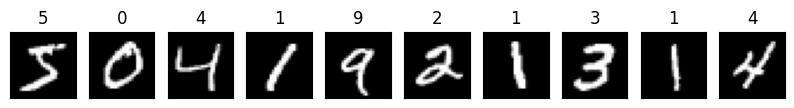

In [ ]:
# Display some images
fig, axes = plt.subplots(ncols = 10, sharex = False, sharey = True, figsize = (10, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap = 'gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

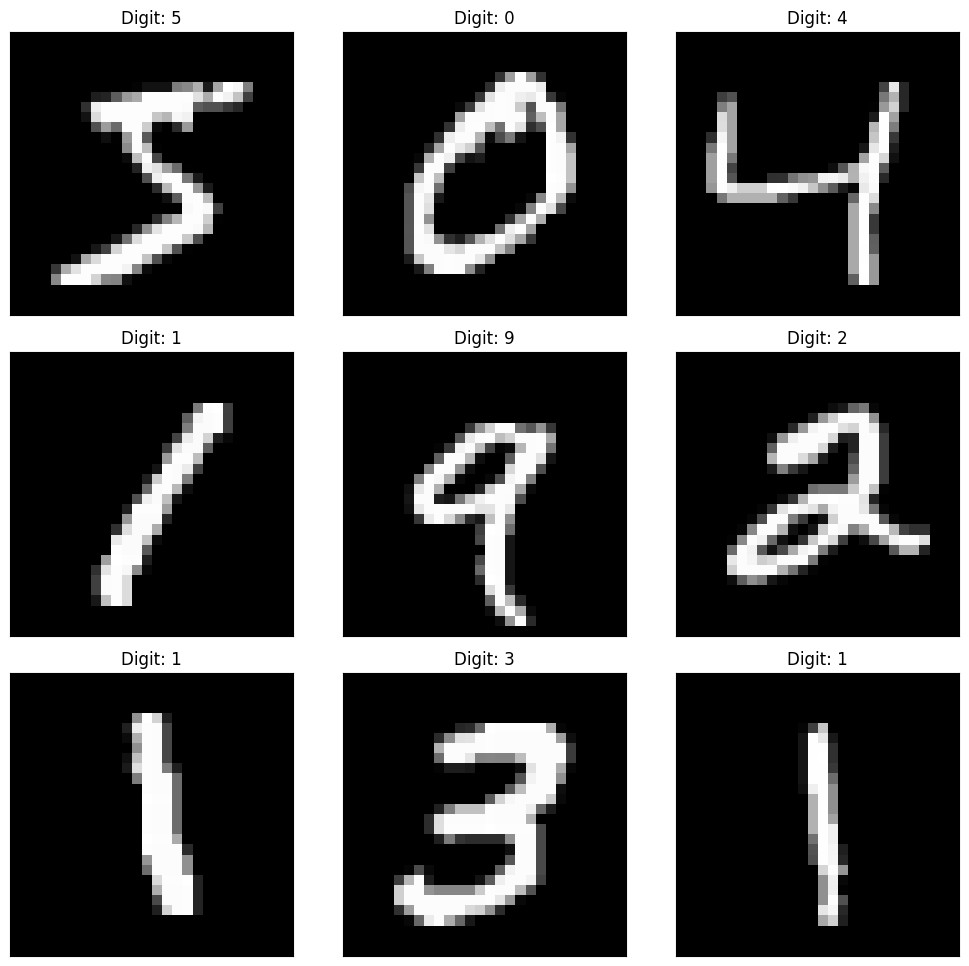

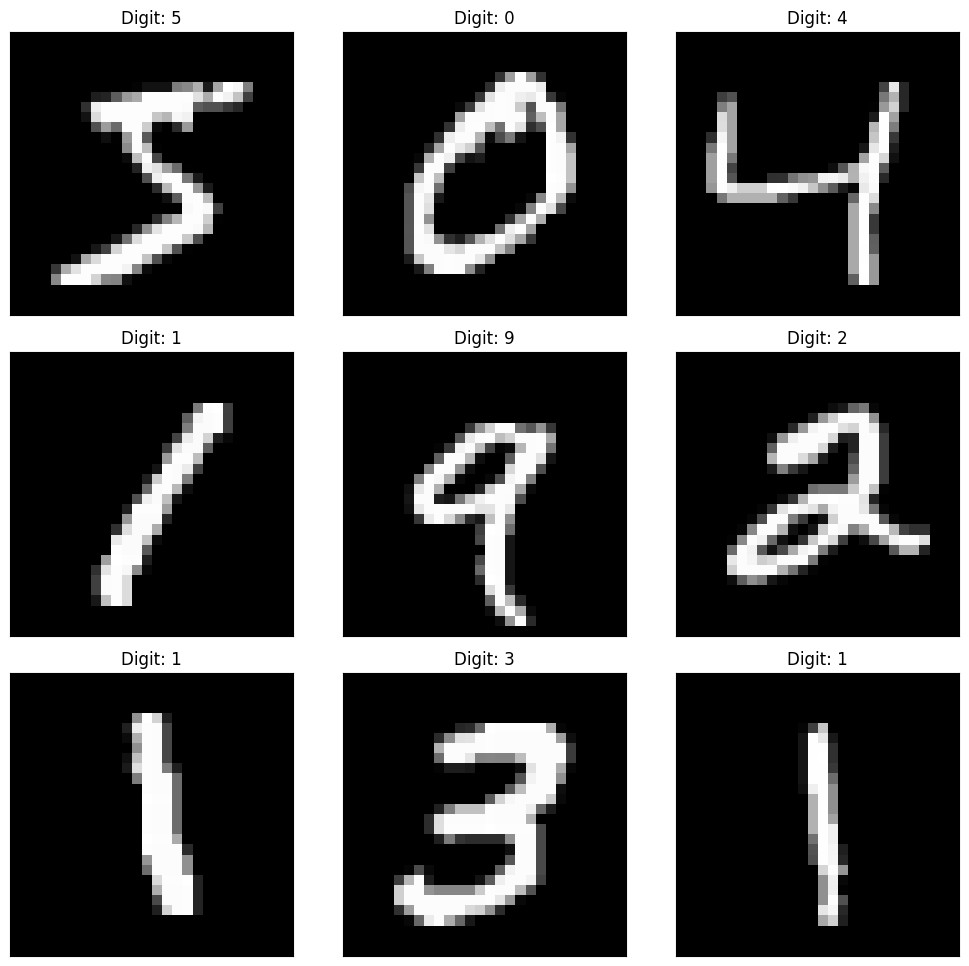

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap = 'gray', interpolation = 'none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

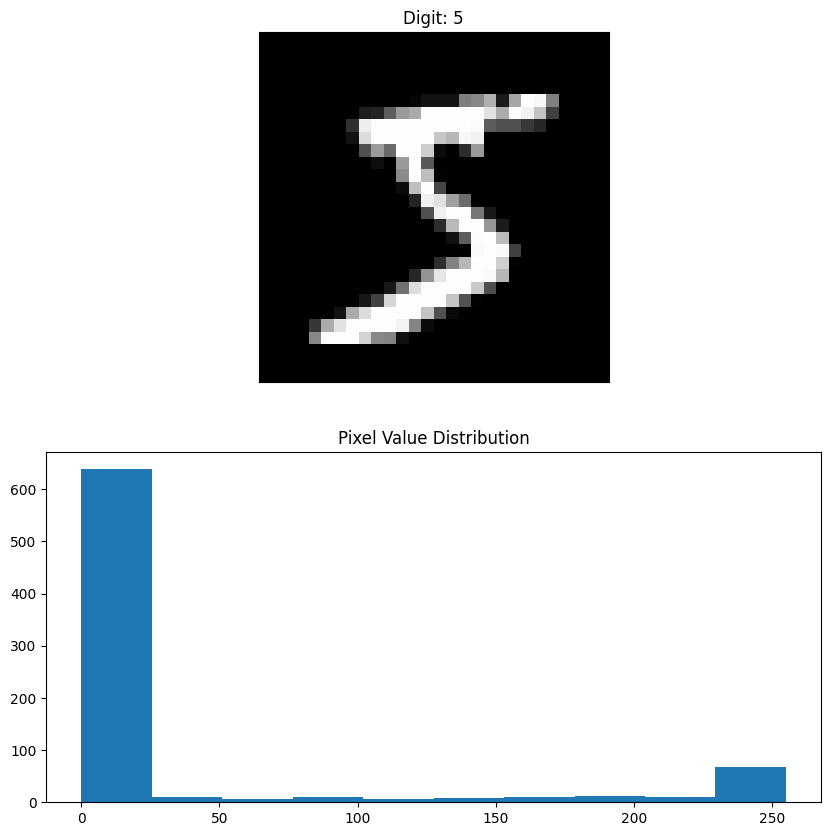

In [ ]:
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.imshow(X_train[0], cmap = 'gray', interpolation = 'none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2, 1, 2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
plt.show()

In [ ]:
# Let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# Building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the data to assist with the training
X_train /= 255
X_test /= 255

# Printing the final input shape ready for training
print("Training matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Training matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [ ]:
print(np.unique(y_train, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [ ]:
# One-hot encoding using Keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
# Building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape = (784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
# Compiling the sequential model
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [ ]:
# Access the drive from Colab to access the file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Epoch 1/20
469/469 - 15s - loss: 0.2528 - accuracy: 0.9239 - val_loss: 0.1063 - val_accuracy: 0.9661 - 15s/epoch - 33ms/step
Epoch 2/20
469/469 - 7s - loss: 0.1015 - accuracy: 0.9682 - val_loss: 0.0754 - val_accuracy: 0.9771 - 7s/epoch - 16ms/step
Epoch 3/20
469/469 - 9s - loss: 0.0722 - accuracy: 0.9777 - val_loss: 0.0688 - val_accuracy: 0.9777 - 9s/epoch - 19ms/step
Epoch 4/20
469/469 - 7s - loss: 0.0572 - accuracy: 0.9819 - val_loss: 0.0676 - val_accuracy: 0.9786 - 7s/epoch - 16ms/step
Epoch 5/20
469/469 - 9s - loss: 0.0456 - accuracy: 0.9846 - val_loss: 0.0696 - val_accuracy: 0.9801 - 9s/epoch - 19ms/step
Epoch 6/20
469/469 - 7s - loss: 0.0424 - accuracy: 0.9862 - val_loss: 0.0667 - val_accuracy: 0.9795 - 7s/epoch - 16ms/step
Epoch 7/20
469/469 - 8s - loss: 0.0334 - accuracy: 0.9888 - val_loss: 0.0636 - val_accuracy: 0.9820 - 8s/epoch - 18ms/step
Epoch 8/20
469/469 - 9s - loss: 0.0308 - accuracy: 0.9897 - val_loss: 0.0647 - val_accuracy: 0.9819 - 9s/epoch - 19ms/step
Epoch 9/20
469

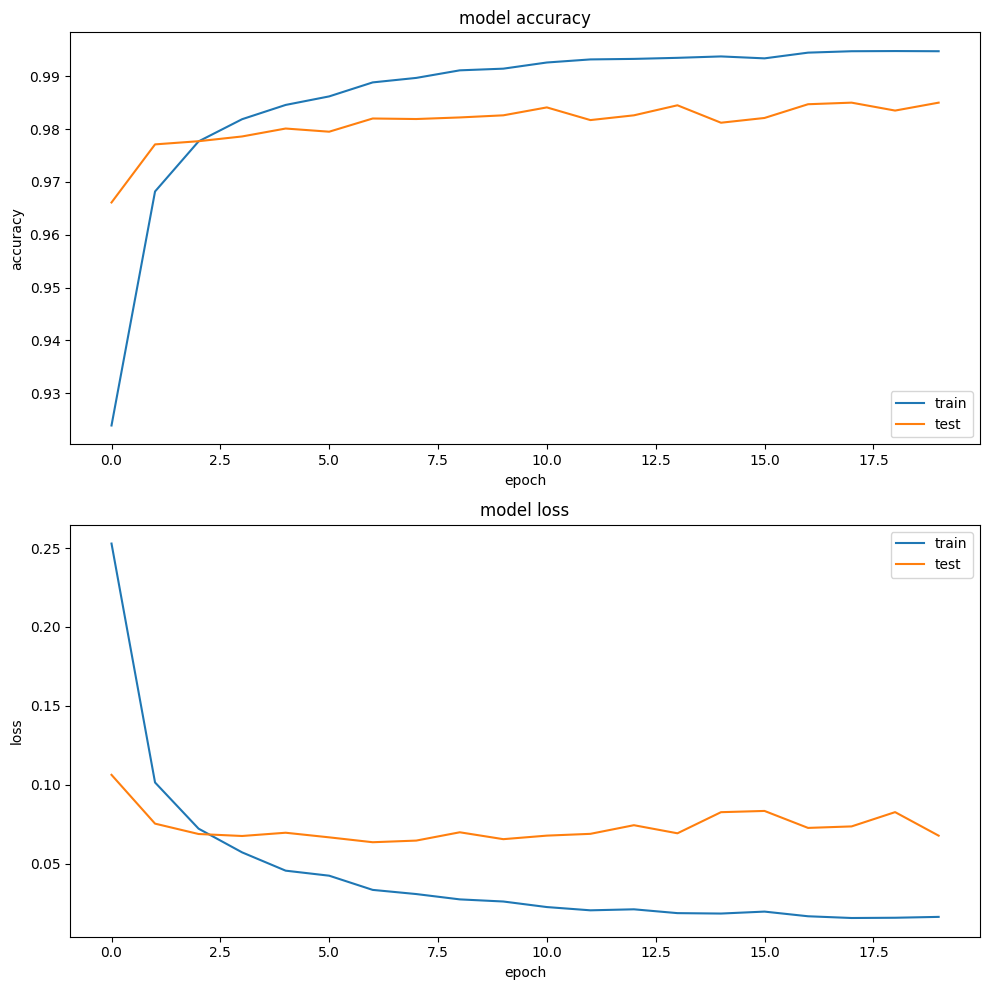

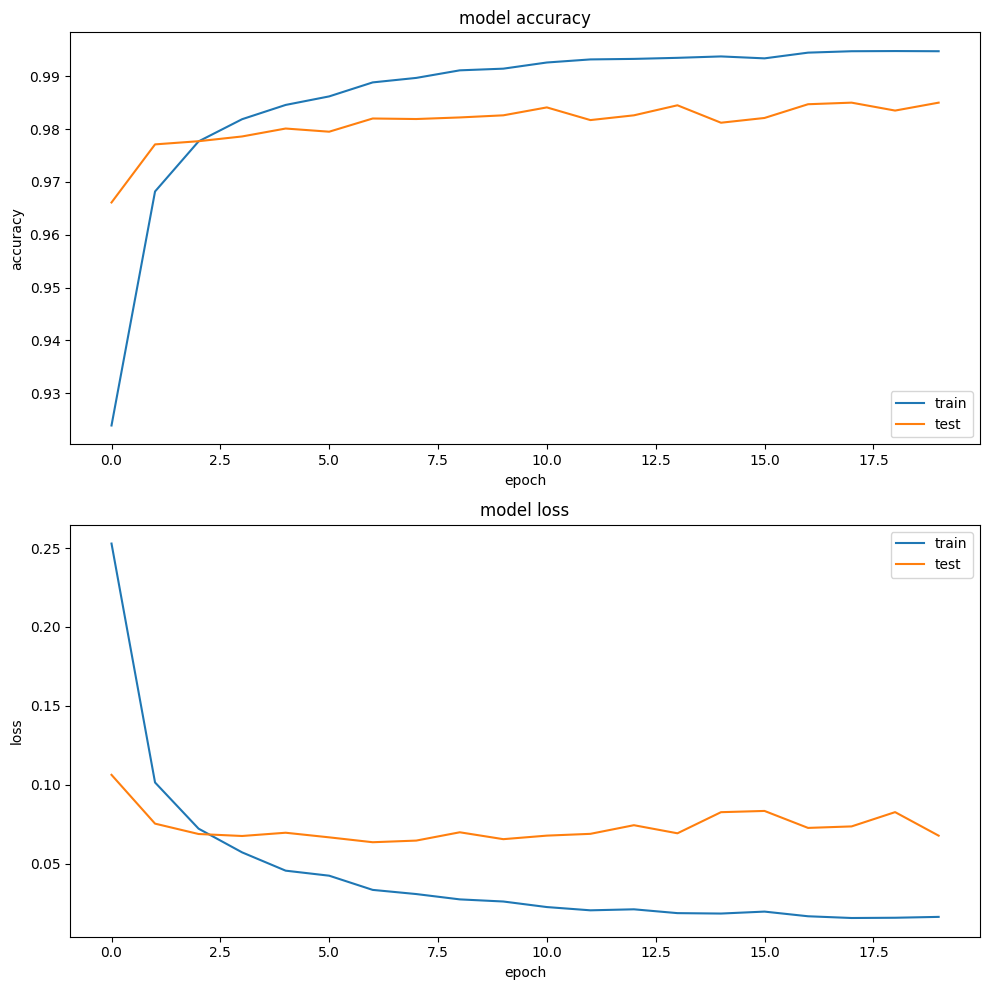

In [ ]:
# Training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size = 128, epochs = 20,
          verbose = 2,
          validation_data = (X_test, Y_test))

# Saving the model
save_dir = "/content/drive/MyDrive/Colab_Notebook/Internship_Name/LetsGrowMore/File_Name/"
model_name = 'MNIST_dataset.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Plotting the metrics
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'lower right')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.tight_layout()
fig

In [ ]:
mnist_model = load_model("/content/drive/MyDrive/Colab_Notebook/Internship_Name/LetsGrowMore/File_Name/MNIST_dataset.h5")
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose = 2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0678 - accuracy: 0.9850 - 944ms/epoch - 3ms/step
Test Loss 0.06776878237724304
Test Accuracy 0.9850000143051147


313/313 [==============================] - 1s 3ms/step

9850 classified correctly
150 classified incorrectly


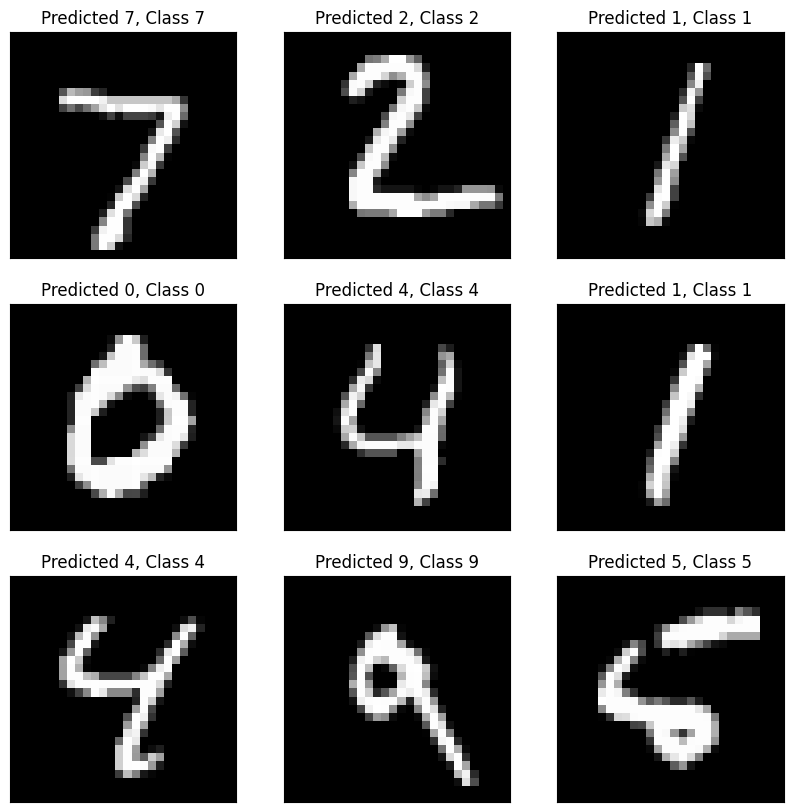

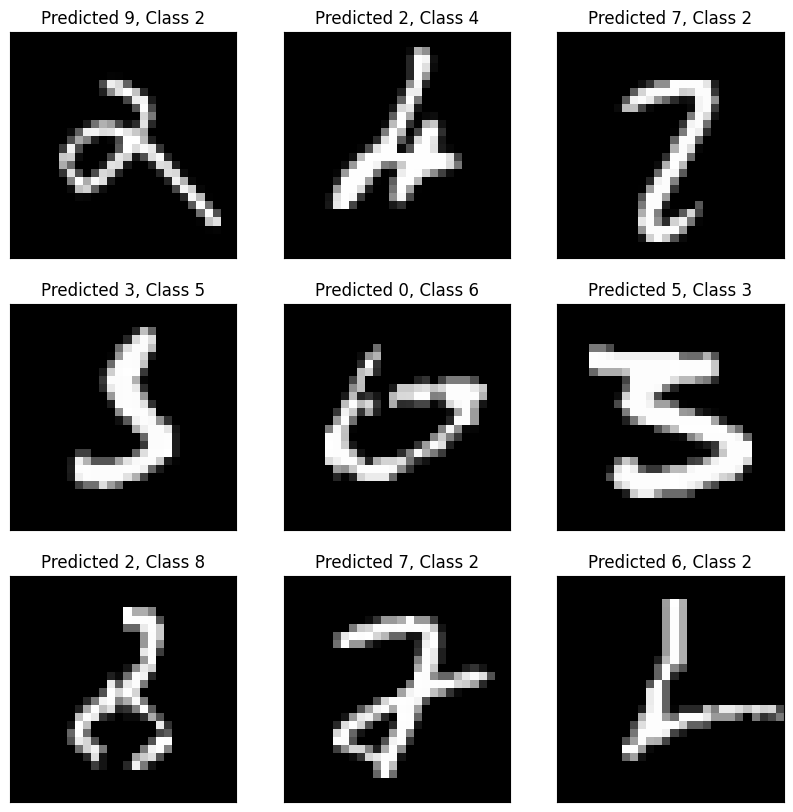

In [ ]:
# Loading the model and creating predictions on the test set
mnist_model = load_model("/content/drive/MyDrive/Colab_Notebook/Internship_Name/LetsGrowMore/File_Name/MNIST_dataset.h5")
predict_x = mnist_model.predict(X_test)
classes_x = np.argmax(predict_x, axis = 1)

# Convert one-hot encoded Y_test to integer labels
Y_test_labels = np.argmax(Y_test, axis=1)

# See which we predicted correctly and which ones we did not
correct_indices = np.nonzero(classes_x == Y_test_labels)[0]
incorrect_indices = np.nonzero(classes_x != Y_test_labels)[0]
print()
print(len(correct_indices), "classified correctly")
print(len(incorrect_indices), "classified incorrectly")

# Adapt figure size to accommodate 18 subplots
plt.rcParams['figure.figsize'] = (10, 10)

# Plot correct predictions
figure_correct = plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(classes_x[correct], Y_test_labels[correct]))
    plt.xticks([])
    plt.yticks([])

# Plot incorrect predictions
figure_incorrect = plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(classes_x[incorrect], Y_test_labels[incorrect]))
    plt.xticks([])
    plt.yticks([])

plt.show()

## **Conclusion:**

In conclusion, the project to develop a neural network capable of reading handwriting using the MNIST dataset has been a remarkable journey into the world of computer vision and deep learning.

By leveraging the MNIST dataset, which is a widely recognized benchmark in the field of handwritten digit recognition, we have successfully trained a neural network model that can accurately identify and interpret handwritten digits.

Throughout the project, we explored various deep learning techniques and architectures, such as convolutional neural networks (CNNs), to extract meaningful features from the MNIST images. We carefully designed the neural network, fine-tuned its parameters, and optimized its performance to achieve exceptional accuracy in recognizing handwritten digits.

The MNIST dataset provided us with a robust foundation for training and evaluating our model. Its vast collection of labeled handwritten digits allowed us to effectively train our neural network, enabling it to generalize and accurately predict digits from unseen samples.

The successful development of a neural network capable of reading handwriting opens up a multitude of possibilities in diverse applications, including automated digit recognition systems, document processing, and even assisting individuals with reading difficulties.

While the MNIST dataset has served as an excellent starting point, it is important to note that real-world handwriting can be more challenging due to varying styles, noise, and context. Further advancements, such as utilizing larger and more diverse datasets, incorporating advanced techniques like data augmentation and transfer learning, can enhance the model's performance and make it more robust.

This project has not only provided us with valuable insights into computer vision and deep learning but has also equipped us with the skills to tackle complex pattern recognition tasks. We look forward to applying these skills to solve real-world problems and contribute to the exciting field of artificial intelligence.